<a href="https://colab.research.google.com/github/onolab-tmu/audio-processing-100-knocks/blob/master/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## アレー演算とオーディオデータの読み込み

今日はパイソンでアレーと行列の使い方を学んでから、オーディオデータの読み込みと書き込みを学びます。


## Numpy入門

パイソンではアレー演算のためのパッケージは`numpy`です。

In [82]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print(x + y)

[5 7 9]


パイソンの`List`に比べて見ましょう。

In [83]:
x_list = [1, 2, 3]
y_list = [4, 5, 6]

print(x_list + y_list)

[1, 2, 3, 4, 5, 6]


`List`だと、`+`は2つのリストを区付けるだけ。

`numpy.array`はアレーの予想ごとで計算ができます。


In [84]:
# `arange`関数はよく使います
x = np.arange(10)
print("arange(10) =", x)

arange(10) = [0 1 2 3 4 5 6 7 8 9]


In [85]:
# スタート、エンドも変えられます
# 注意：スタートは入ってる、エンドは入っていない
y = np.arange(5, 15)
print("arange(5, 15) =", y)

arange(5, 15) = [ 5  6  7  8  9 10 11 12 13 14]


In [86]:
# 足し算
print("x + y =", x + y)

x + y = [ 5  7  9 11 13 15 17 19 21 23]


In [87]:
# 掛け算
print("x * y =", x * y)

x * y = [  0   6  14  24  36  50  66  84 104 126]


In [88]:
# 割り算 (ゼロ割り算は注意)
print("x / y =", x / y)

x / y = [0.         0.16666667 0.28571429 0.375      0.44444444 0.5
 0.54545455 0.58333333 0.61538462 0.64285714]


In [89]:
# xのy条 (numpyでは、指数関数は `**` で書きます)
print("x ** y =", x ** y)
print("x ** 2 =", x ** 2)

x ** y = [             0              1            128           6561
         262144        9765625      362797056    13841287201
   549755813888 22876792454961]
x ** 2 = [ 0  1  4  9 16 25 36 49 64 81]


In [90]:
# 対数
print("log(y) =", np.log(y))
print("log10(y) =", np.log10(y))

log(y) = [1.60943791 1.79175947 1.94591015 2.07944154 2.19722458 2.30258509
 2.39789527 2.48490665 2.56494936 2.63905733]
log10(y) = [0.69897    0.77815125 0.84509804 0.90308999 0.95424251 1.
 1.04139269 1.07918125 1.11394335 1.14612804]


In [91]:
# 指数関数
print("exp(y) =", np.exp(x))

exp(y) = [1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


Numpyでは他の関数も沢山あります。例えば
* `sin`
* `cos`
* `round`
* リストは[こちらです](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

## オーディオデータ

オーディオデータはただの整数の列なので、`numpy`は扱うに得意です。

最初はオーディオのデータサンプルをダウンロードしましょう。ファイル名は`piano.wav`です。


In [92]:
!wget -O piano2.wav https://github.com/onolab-tmu/audio-processing-100-knocks/blob/master/data/piano2.wav?raw=true

--2019-10-31 05:58:53--  https://github.com/onolab-tmu/audio-processing-100-knocks/blob/master/data/piano2.wav?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/onolab-tmu/audio-processing-100-knocks/raw/master/data/piano2.wav [following]
--2019-10-31 05:58:53--  https://github.com/onolab-tmu/audio-processing-100-knocks/raw/master/data/piano2.wav
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/onolab-tmu/audio-processing-100-knocks/master/data/piano2.wav [following]
--2019-10-31 05:58:53--  https://raw.githubusercontent.com/onolab-tmu/audio-processing-100-knocks/master/data/piano2.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubuserconten

`wav`ファイルを読み込むに`scipy.io`パッケージを使います。

In [0]:
from scipy.io import wavfile

In [0]:
# `wavfile.read`は`wav`ファイルを読み込みます
# リターン変数は
# `fs`: サンプリング周波数
# `data`: オーディオデータ入ってるnumpy array
fs, data = wavfile.read("piano2.wav")

`numpy`で、アレーのサイズを確かめられます。

In [95]:
# `data.shape`でアレーの形を調べられます。
# 行列みたいに第一次元は行の数、第２次元は列の数です。
print("The shape of the audio array is", data.shape)

The shape of the audio array is (302712, 2)


これで、オーディオデータのアレーは２次元だとわかります。
* １番目の次元は**時間**です。ユニットはサンプルです。
* ２番目の次元は**チャンネル**です。

サンプルの数とサンプリング周波数の割り算でオーディオの長さが分かります。

In [96]:
print(f"The audio sample has {data.shape[1]} channels and is {data.shape[0] / fs} seconds long.")

The audio sample has 2 channels and is 6.3065 seconds long.


Google Colabで再生もできます！

In [0]:
from IPython.display import Audio

In [98]:
# モノラル再生しかいできないので、`data[:, 0]`を書いて、
# 第０目の列を選びます
Audio(data[:, 0], rate=fs)

numpyアレーを見るには`matplotlib`パッケージは役に立ちます。

アレーの中身はyー軸のあたりになります。
デフォルトで、xー軸はインデックスです。

In [0]:
import matplotlib.pyplot as plt

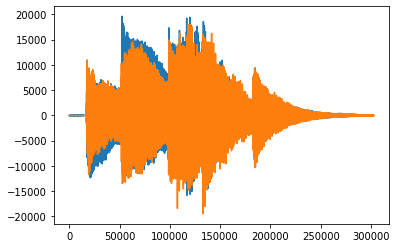

In [100]:
# `plot`が`data`の列をひとつずつ書きます
plt.plot(data)

xー軸のデータを示すこともできます。オーディオだと時間にするのが自然です。

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


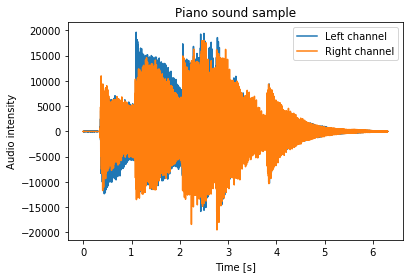

In [101]:
time = np.arange(data.shape[0]) / fs
plt.plot(time, data)
# 図情報を追加はできます。
# タイトル
plt.title("Piano sound sample")
# 軸のラベル
plt.xlabel("Time [s]")
plt.ylabel("Audio intensity")
# レジェンド
plt.legend(["Left channel", "Right channel"])

## 練習問題

### 第１問題

４４０ヘルツの正弦波を作って、図でみて、再生しましょう。

正弦波は続けての式で表します。
$$
f(t) = sin(2 \pi f t)
$$

* $t$ は時間です。離散しかできないので、サンプリング周波数$f_s$を選んで、$t = \frac{n}{fs}$, $n=0, 1, 2, \ldots, T_{\max}$ で計算しましょう。サンプリング周波数は16000ヘルツは良く使われます。
* $f$ は周波数です。今回の場合は`f=440`です。
* `numpy`では$\pi$は`np.pi`です。

必要な関数
* `np.arange`
* `np.pi`
* `np.sin`
* `plt.plot`
* `Audio`


In [0]:
fs = 16000
f = 440.  # hertz
t_max = 5.  # seconds
time = np.arange(int(t_max * fs)) / fs
f = np.sin(2. * np.pi * f * time)

In [103]:
Audio(f, rate=fs)

(0, 0.0022727272727272726)

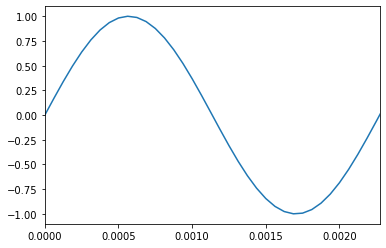

In [104]:
plt.plot(time, f)
plt.xlim([0, 1 / f0])

### 第２問題（ビーツ）

440ヘルツと441ヘルツの正弦波を作って、足して、再生しましょう。音はどうですか？


In [105]:
time = np.arange(5 * fs) / fs
f0 = 440.
y1 = np.sin(2. * np.pi * f0 * time)
y2 = np.sin(2. * np.pi * (f0 + 1) * time)
Audio(y1, rate=fs)

In [106]:
Audio(y2, rate=fs)

In [107]:
Audio(y1 + y2, rate=fs)

(0, 0.00909090909090909)

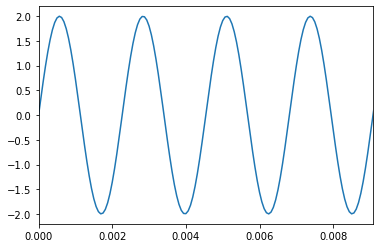

In [108]:
plt.plot(time, y1 + y2)
plt.xlim([0, 4 / 440])

### 第３問題

今回はピアノのオーディオのサンプリング周波数を変えてみましょう。

1. まず、`piano2.wav`ファイルを読み込んで
2. 正しいサンプリング周波数で再生する
3. ２倍のサンプリング周波数で再生する
4. 半分のサンプリング周波数で再生する

In [113]:
fs, piano = wavfile.read("piano2.wav")

Audio(piano[:, 0], rate=fs)

In [116]:
Audio(piano[:, 0], rate=int(2 * fs))

In [117]:
Audio(piano[:, 0], rate=int(0.5 * fs))

### 第４問題

今回は音を逆で再生しましょう。

1. ピアノ
2. 音声


In [119]:
Audio(piano[::-1, 0], rate=fs)

音声は新しいファイルが必要です。


In [110]:
!wget https://github.com/onolab-tmu/audio-processing-100-knocks/raw/master/data/cmu_arctic_us_aew_a0001.wav

--2019-10-31 05:58:59--  https://github.com/onolab-tmu/audio-processing-100-knocks/raw/master/data/cmu_arctic_us_aew_a0001.wav
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/onolab-tmu/audio-processing-100-knocks/master/data/cmu_arctic_us_aew_a0001.wav [following]
--2019-10-31 05:58:59--  https://raw.githubusercontent.com/onolab-tmu/audio-processing-100-knocks/master/data/cmu_arctic_us_aew_a0001.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124206 (121K) [audio/wav]
Saving to: ‘cmu_arctic_us_aew_a0001.wav.1’

cmu_arctic_us_aew_a 100%[===================>] 121.29K  --.-KB/s    in 0.02s   



In [0]:
fs_voice, voice = wavfile.read("cmu_arctic_us_aew_a0001.wav")

In [123]:
# 最初は普通に再生
Audio(voice, rate=fs_voice)

In [124]:
# 次は逆で再生
Audio(voice[::-1], rate=fs_voice)